In [2]:
from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
from gensim.models.coherencemodel import CoherenceModel
import seaborn as sns

<ipython-input-2-0ac2a2db74c1>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook,tnrange,tqdm
C:\Users\somfl\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [95]:
# Importing necessary libraries
import gzip
import json
import os
import sys

import pandas as pd
import numpy as np
import nltk

nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
nltk.download('wordnet')

from gensim.parsing.preprocessing import remove_stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from gensim import corpora, models
from nltk import word_tokenize, pos_tag

from sklearn.decomposition import NMF


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\somfl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\somfl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
DIR = 'C:\\Users\\somfl\\Documents\\GitHub\\Somayeh_Youssefi\\Book Recomendation System\\data_files'

In [66]:
path = 'C:\\Users\\somfl\\Documents\\GitHub\\Somayeh_Youssefi\\Book Recomendation System\\data_files\\CleanedBooks.csv'
df = pd.read_csv(path, sep=',')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,book_id,isbn,title,description,num_pages,authors,ratings_count,average_rating,image_url,url,similar_books,authors_names,genres,positive_review,negative_review
0,287141,1599150603,The Aeneid for Boys and Girls,"Relates in vigorous prose the tale of Aeneas, ...",162.0,"[{'author_id': '3041852', 'role': ''}]",46.0,4.13,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/287141.The...,[],['Alfred J. Church'],"{'history, historical fiction, biography': 9, ...","Once again, my kids loved this book about anci...",NaN
1,6066812,1934876569,All's Fairy in Love and War (Avalon: Web of Ma...,"To Kara's astonishment, she discovers that a p...",216.0,"[{'author_id': '19158', 'role': ''}]",98.0,4.22,https://images.gr-assets.com/books/1316637798m...,https://www.goodreads.com/book/show/6066812-al...,"['948696', '439885', '274955', '12978730', '37...",['Rachel Roberts'],"{'fantasy, paranormal': 32, 'young-adult': 8, ...",NaN,"This was a really cute book, though to be hone..."
2,89378,0590417010,Dog Heaven,In Newbery Medalist Cynthia Rylant's classic b...,40.0,"[{'author_id': '5411', 'role': ''}]",1331.0,4.43,https://images.gr-assets.com/books/1360057676m...,https://www.goodreads.com/book/show/89378.Dog_...,"['834493', '452189', '140185', '1897316', '218...",['Cynthia Rylant'],"{'children': 109, 'fiction': 13, 'non-fiction'...","Really cute, sweet, and charming.,This beautif...",I probably would have liked this book more if ...
3,1698376,1416904999,What Do You Do?,WHAT DO YOU DO?\nA hen lays eggs...\nA cow giv...,24.0,"[{'author_id': '169159', 'role': ''}]",23.0,3.57,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/1698376.Wh...,[],['Mandy Stanley'],{'children': 6},NaN,Colourful. Fun to read. My daughter enjoys thi...
4,3631900,0884482987,Amadi's Snowman: A Story of Reading,When Amadi disobeys his mother and runs off to...,32.0,"[{'author_id': '1540277', 'role': ''}, {'autho...",44.0,3.89,https://images.gr-assets.com/books/1300370678m...,https://www.goodreads.com/book/show/3631900-am...,[],"['Katia Novet Saint-Lot', 'Dimitrea Tokunbo']","{'fiction': 6, 'children': 8, 'young-adult': 1}",My nine-year-old son and I enjoyed this book a...,"This is an enjoyable book, and Amadi is an eng..."


In [67]:
df.drop(index=21909, axis=0, inplace = True)
df = df.reset_index().drop(columns='index')

In [68]:
df.isna().sum()

book_id                0
isbn                4650
title                  0
description            0
num_pages              0
authors                0
ratings_count          0
average_rating         0
image_url              0
url                    0
similar_books          0
authors_names          0
genres                 0
positive_review    10716
negative_review    22928
dtype: int64

In [69]:
df.shape

(59996, 15)

In [70]:
df['book_id'] = df['book_id'].astype(str)

In [71]:
df.dropna(subset=['negative_review', 'positive_review'], inplace=True)

In [72]:
df.shape

(26411, 15)

In [73]:
df = df.reset_index()

In [77]:
reviews = []
filename = os.path.join(DIR, 'goodreads_reviews_children.json.gz') 
with gzip.open(filename) as file:
    for l in file:
        
        reviews.append(json.loads(l))

reviews = pd.DataFrame(reviews)
reviews.head(3).T

,0,1,2
user_id,8842281e1d1347389f2ab93d60773d4d,8842281e1d1347389f2ab93d60773d4d,8842281e1d1347389f2ab93d60773d4d
book_id,23310161,17290220,6954929
review_id,f4b4b050f4be00e9283c92a814af2670,22d424a2b0057b18fb6ecf017af7be92,50ed4431c451d5677d98dd25ca8ec106
rating,4,5,5
review_text,Fun sequel to the original.,One of my favorite books to read to my 5 year ...,One of the best and most imaginative childrens...
date_added,Tue Nov 17 11:37:35 -0800 2015,Sat Nov 08 08:54:03 -0800 2014,Thu Oct 23 13:46:20 -0700 2014
date_updated,Tue Nov 17 11:38:05 -0800 2015,Wed Jan 25 13:56:12 -0800 2017,Thu Oct 23 13:47:00 -0700 2014
read_at,,Tue Jan 24 00:00:00 -0800 2017,
started_at,,,
n_votes,7,4,6


In [78]:
neg_book_review = []
neg_book_id = []
neg_review_text = []
for i in range(len(reviews)):
    text = reviews.loc[i,'review_text'].lower()
    if ((re.search('wrong message', text)) or (re.search('bad message', text)) or (re.search('body shame', text)) or (re.search('racist',text)) 
    or (re.search('hate speech', text)) or (re.search('body shaming', text)) or (re.search('physical appearance', text)) or (re.search('violence', text))
    or (re.search('stereotyping', text)) or (re.search('derogatory', text))):
        neg_book_id.append(reviews.loc[i,'book_id'])
        neg_book_review.append((reviews.loc[i,'book_id'],text))
        neg_review_text.append(text) 

In [79]:
len(set(neg_book_review))

2819

In [80]:
print("There are {} negative reviews and there are {} books with negative material".format(len(set(neg_review_text)), len(set(neg_book_id))))

There are 2768 negative reviews and there are 1918 books with negative material


In [81]:
# Let's see how many board books we have:
board_book_list = []
for i in range(len(df)):
    text = df.loc[i, 'description'].lower()
    if ((re.search('board book', text)) or (re.search('sensory', text)) or (re.search('touch', text)) or (re.search('flap',text))
    or (re.search('new reader', text)) or (re.search('teach color', text)) or (re.search('teach numbers', text)) 
    or (re.search('teach color', text)) or (re.search('infant', text)) or (re.search('toddler', text)) or (re.search('baby', text))
    or (re.search('illustration', text) and re.search('toddler', text)) or (re.search('picture', text) and re.search('toddler', text))
    or (re.search('illustration', text) and re.search('baby', text)) or (re.search('picture', text) and re.search('toddler', text))):
        board_book_list.append(df.loc[i,'book_id'])
        

In [82]:
len(board_book_list)

2559

In [83]:
# df_kid_book
non_kid_list = board_book_list + neg_book_id
mask = ~df['book_id'].isin(set(non_kid_list))
df_kid_book = df[mask]
df_kid_book.drop(['index'], axis=1, inplace=True)
df_kid_book = df_kid_book.reset_index()
df_kid_book.drop(['index'], axis=1, inplace=True)

df_kid_book.head(4)

,book_id,isbn,title,description,num_pages,authors,ratings_count,average_rating,image_url,url,similar_books,authors_names,genres,positive_review,negative_review
0,89378,0590417010,Dog Heaven,In Newbery Medalist Cynthia Rylant's classic b...,40.0,"[{'author_id': '5411', 'role': ''}]",1331.0,4.43,https://images.gr-assets.com/books/1360057676m...,https://www.goodreads.com/book/show/89378.Dog_...,"['834493', '452189', '140185', '1897316', '218...",['Cynthia Rylant'],"{'children': 109, 'fiction': 13, 'non-fiction'...","Really cute, sweet, and charming.,This beautif...",I probably would have liked this book more if ...
1,3631900,0884482987,Amadi's Snowman: A Story of Reading,When Amadi disobeys his mother and runs off to...,32.0,"[{'author_id': '1540277', 'role': ''}, {'autho...",44.0,3.89,https://images.gr-assets.com/books/1300370678m...,https://www.goodreads.com/book/show/3631900-am...,[],"['Katia Novet Saint-Lot', 'Dimitrea Tokunbo']","{'fiction': 6, 'children': 8, 'young-adult': 1}",My nine-year-old son and I enjoyed this book a...,"This is an enjoyable book, and Amadi is an eng..."
2,12624257,0007274688,FIRST WEEK AT COW SCHOOL,Starting school is full of fun in this laugh-o...,32.0,"[{'author_id': '596418', 'role': ''}, {'author...",61.0,3.53,https://images.gr-assets.com/books/1328834823m...,https://www.goodreads.com/book/show/12624257-f...,[],"['Andy Cutbill', 'Russell Ayto']",{'children': 3},"Munasta kuoriutuneen ""lehman"" vaikea koulunalk...","The illustrations made me smile.,Everyone need..."
3,14287192,1400320259,"Totally Awesome, Super-Cool Bible Stories as D...",Join Ned as he draws--and learns--his way thro...,240.0,"[{'author_id': '5989065', 'role': 'Creator'}]",12.0,4.00,https://images.gr-assets.com/books/1355064907m...,https://www.goodreads.com/book/show/14287192-t...,[],['Corey Adams'],"{'children': 5, 'non-fiction': 1, 'young-adult...","Totally Awesome, Super-Cool Bible Stories as D...",Got this from NetGalley in exchange for a revi...


In [84]:
df_kid_book.shape

(22819, 15)

In [85]:
# Let's define a function to clean the text

def clean_function (text):

    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # remove non-ASCII characheters
    
    text = "".join(i for i in text if  ord(i)<128)
    
    # change to lower case
    text = text.lower()

    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    contractions = { 
    "ain't": "am not","aint": "am not",
    "aren't": "are not","arent": "are not",
    "can't": "cannot","cant": "cannot",
    "can't've": "cannot have","cant've": "cannot have",
    "'cause": "because",
    "could've": "could have","couldve": "could have",
    "couldn't": "could not","couldnt": "could not",
    "couldn't've": "could not have","couldnt've": "could not have",
    "didn't": "did not","didnt": "did not",
    "doesn't": "does not","doesnt": "does not",
    "don't": "do not","dont": "do not",
    "hadn't": "had not","hadnt": "had not",
    "hadn't've": "had not have","hadnt've": "had not have",
    "hasn't": "has not","hasnt": "has not",
    "haven't": "have not","havent": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would","id": "i would",
    "i'll": "i will",
    "i'm": "i am","im": "i am",
    "i've": "i have","ive": "i have",
    "isn't": "is not","isnt": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not","mustnt": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is","thats": "that is",
    "there'd": "there had",
    "there's": "there is","theres": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where'd": "where did",
    "where's": "where is",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are"
    }
    

    text = word_tokenize(text)
    # Replace contractions with their longer forms 
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    text = " ".join(new_text)
        
    # Removing english stopwords 
    text = remove_stopwords(text)
    


    return text
# Lemmatize and stemming

def preprocess(text):
    text = word_tokenize(text)
    result = []
    for word in text:

        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        lemm = nltk.stem.WordNetLemmatizer().lemmatize(word, tag_dict.get(tag, wordnet.NOUN))
        
        stemmer = SnowballStemmer('english')
        stemm = stemmer.stem(lemm)
        result.append(stemm)
    result = " ".join(result)
    return result

def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(nltk.stem.WordNetLemmatizer().lemmatize(text, pos='v'))


In [ ]:
## Topic Extraction

In [86]:
df_kid_book['clean_desc'] = df_kid_book['description'].apply(clean_function)
df_kid_book['lem_clean_desc'] = df_kid_book['clean_desc'].apply(preprocess)

In [224]:
df_kid_book['clean_desc'] = df_kid_book['description'].apply(clean_function)
df_kid_book['lem_clean_desc'] = df_kid_book['clean_desc'].apply(preprocess)

def recomm_title(book_title):

    indx = pd.Series(df_kid_book.index, index = df_kid_book['title'])

    #Converting the book discription into vectors
    tfModel = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df = 1, stop_words='english')
    tfidf_vector = tfModel.fit_transform(df_kid_book['lem_clean_desc'])
    
    # Estimate the similarity of book description based on Cosine Similarity
    similarity_matrix = cosine_similarity(tfidf_vector, tfidf_vector)
    
    # Get the index corresponding to original_title
       
    idx = indx[book_title]# Get the pairwsie similarity scores 
    similar_books = sorted(list(enumerate(similarity_matrix[idx])), key=lambda x: x[1], reverse=True)
    Top_five_similar_books = similar_books[1:6]# Book indicies
    book_indices = [i[0] for i in Top_five_similar_books]
   
    # Top 10 book recommendation
    recommendation = df_kid_book[['title', 'authors_names']].iloc[book_indices]
       
    # It reads the top 5 recommended book urls and print the images
    

    return recommendation

In [225]:
df_kid_book.loc[0:2,:]

,book_id,isbn,title,description,num_pages,authors,ratings_count,average_rating,image_url,url,similar_books,authors_names,genres,positive_review,negative_review,clean_desc,lem_clean_desc
0,89378,0590417010,Dog Heaven,In Newbery Medalist Cynthia Rylant's classic b...,40.0,"[{'author_id': '5411', 'role': ''}]",1331.0,4.43,https://images.gr-assets.com/books/1360057676m...,https://www.goodreads.com/book/show/89378.Dog_...,"['834493', '452189', '140185', '1897316', '218...",['Cynthia Rylant'],"{'children': 109, 'fiction': 13, 'non-fiction'...","Really cute, sweet, and charming.,This beautif...",I probably would have liked this book more if ...,newbery medalist cynthia rylant s classic best...,newberi medalist cynthia rylant s classic best...
1,3631900,0884482987,Amadi's Snowman: A Story of Reading,When Amadi disobeys his mother and runs off to...,32.0,"[{'author_id': '1540277', 'role': ''}, {'autho...",44.0,3.89,https://images.gr-assets.com/books/1300370678m...,https://www.goodreads.com/book/show/3631900-am...,[],"['Katia Novet Saint-Lot', 'Dimitrea Tokunbo']","{'fiction': 6, 'children': 8, 'young-adult': 1}",My nine-year-old son and I enjoyed this book a...,"This is an enjoyable book, and Amadi is an eng...",amadi disobeys mother runs market instead stic...,amadi disobey mother run market instead stick ...
2,12624257,0007274688,FIRST WEEK AT COW SCHOOL,Starting school is full of fun in this laugh-o...,32.0,"[{'author_id': '596418', 'role': ''}, {'author...",61.0,3.53,https://images.gr-assets.com/books/1328834823m...,https://www.goodreads.com/book/show/12624257-f...,[],"['Andy Cutbill', 'Russell Ayto']",{'children': 3},"Munasta kuoriutuneen ""lehman"" vaikea koulunalk...","The illustrations made me smile.,Everyone need...",starting school fun laugh loud sequel cow laid...,start school fun laugh loud sequel cow laid eg...


In [226]:
recomm_title('Dog Heaven')

,title,authors_names
6516,Creation,['Cynthia Rylant']
15800,Cat Heaven,['Cynthia Rylant']
1250,The Heaven of Animals,['Nancy Tillman']
15225,Henry and Mudge - The First Book (Henry and Mu...,"['Cynthia Rylant', 'Sucie Stevenson']"
6873,A Day with Dogs,['Dorothee de Monfreid']


In [195]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))        
        
def preprocess(text):
    text = word_tokenize(text)
    result = []
    for word in text:

        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        lemm = nltk.stem.WordNetLemmatizer().lemmatize(word, tag_dict.get(tag, wordnet.NOUN))
        
        stemmer = SnowballStemmer('english')
        stemm = stemmer.stem(lemm)
        result.append(stemm)
    result = " ".join(result)
    return result

def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(nltk.stem.WordNetLemmatizer().lemmatize(text, pos='v'))
        
# Let's create a function to pull out nouns from a string of text
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

def adj(text):
    '''Given a string of text, tokenize the text and pull out only the  adjectives.'''
    is_adj = lambda pos: pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    adj = [word for (word, pos) in pos_tag(tokenized) if is_adj(pos)] 
    return ' '.join(adj)

def review_process(text):
    text = word_tokenize(text)
    stemmer = SnowballStemmer('english')
    result = []
    for word in text:
        stemm = stemmer.stem(nltk.stem.WordNetLemmatizer().lemmatize(word, pos='v'))
        result.append(stemm)
    result = " ".join(result)
    return result


def nouns_v(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and verbs.'''
    is_noun_v = lambda pos: pos[:2] == 'NN' or pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    nouns_v = [word for (word, pos) in pos_tag(tokenized) if is_noun_v(pos)] 
    return ' '.join(nouns_v)

def verbs(text):
    '''Given a string of text, tokenize the text and pull out only the the verbs.'''
    is_verb = lambda pos: pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    verbs = [word for (word, pos) in pos_tag(tokenized) if is_verb(pos)] 
    return ' '.join(verbs)

In [101]:
tfModel = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 1), min_df = 100)

data_cv = tfModel.fit_transform(df_kid_book['positive_review'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=tfModel.get_feature_names())
data_dtm.index = df_kid_book.index
data_dtm_copy = data_dtm
word_df = pd.DataFrame(data_dtm.sum())
word_df = word_df.sort_values(by = 0, ascending = False)
print(word_df.shape)
word_df.head(20)

(5360, 1)


,0
book,2176.979959
read,1218.033328
story,1187.946875
love,719.292997
books,719.214448
great,719.009550
children,699.913893
illustrations,687.545370
like,641.362943
fun,628.696778


In [102]:
custom_stop_words = []
custom_stop_words = word_df[0:40].index 
custom_stop_words = list(custom_stop_words)
custom_stop_words =  custom_stop_words + ['families', 'years', 'reader', 'illustration', 'picture']

In [103]:
def custom_clean(text):
    text = text.split()
    stops = custom_stop_words 
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
    

In [104]:
df_kid_book['first_round'] = df_kid_book['positive_review'].apply(clean_function)
df_kid_book['second_round'] = df_kid_book['first_round'].apply(custom_clean)


In [174]:
df_kid_book['review_topic'] = df_kid_book['second_round'].apply(review_process)

In [175]:
from gensim import corpora, models

text = [df_kid_book.loc[i, 'review_topic'] for i in range(len(df_kid_book))]
docs = [d.split() for d in text]
dictionary_LDA = corpora.Dictionary(docs)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(doc) for doc in docs]

num_topics = 5
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=3, alpha=[0.1]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=6):
    print(str(i)+": "+ topic)
    print()

Wall time: 38.8 s
0: 0.011*"tale" + 0.008*"fairi" + 0.007*"magic" + 0.007*"end" + 0.006*"christma" + 0.006*"know"

1: 0.006*"write" + 0.006*"live" + 0.005*"know" + 0.005*"peopl" + 0.005*"wonder" + 0.005*"world"

2: 0.008*"page" + 0.007*"anim" + 0.007*"color" + 0.006*"word" + 0.006*"text" + 0.006*"wonder"

3: 0.014*"dog" + 0.009*"funni" + 0.008*"cat" + 0.007*"get" + 0.007*"want" + 0.006*"end"

4: 0.008*"friend" + 0.006*"write" + 0.006*"know" + 0.006*"want" + 0.005*"boy" + 0.005*"get"



In [293]:
doc_review= [df_kid_book.loc[i, 'review_topic'] for i in range(len(df_kid_book))]
dataset = [d.split() for d in doc_review]
dictionary_review =  corpora.Dictionary(dataset)
dictionary_review.filter_extremes(no_below=100)
bow_corpus =  [dictionary_review.doc2bow(text) for text in dataset]


In [ ]:
example = bow_corpus[20]

for i in range(len(example)):
    print("Word {} (\"{}\") appears {} time.".format(example[i][0], 
                                                     dictionary_review[example[i][0]], 
                                                     example[i][1]))

  0%|          | 0/24 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Topic coherence')

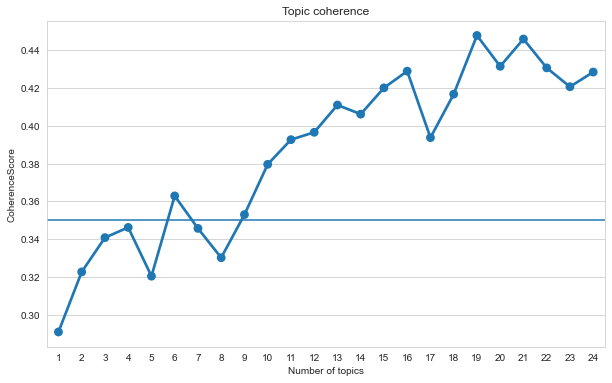

In [305]:


Lda = models.LdaModel
coherenceList_cv = []
num_topics_list = range(1,25)

for num_topics in tqdm(num_topics_list):
    lda= Lda(bow_corpus, num_topics=num_topics,id2word = dictionary_review, 
             passes=5,chunksize=1000,random_state=43)
    cm_cv = CoherenceModel(model=lda, corpus=bow_corpus,
                           texts=dataset, dictionary=dictionary_review, coherence='c_v')
    coherenceList_cv.append(cm_cv.get_coherence())

plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'CoherenceScore':coherenceList_cv})
f,ax = plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")
sns.pointplot(x='Number of topics',y= 'CoherenceScore',data=plotData)
plt.axhline(y=0.35)
plt.title('Topic coherence')


In [19]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

lda_tfidf =models.LdaModel(corpus_tfidf, num_topics=19, id2word=dictionary_review, passes=5, chunksize=1000,random_state=43)

lda_tfidf.save('lda_tfidf')
dictionary_review.save('dictionary_review')
corpora.MmCorpus.serialize('corpus_tfidf.mm', corpus_tfidf)

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'bow_corpus' is not defined

In [27]:
Lda = models.LdaModel
lda_tfidf=Lda.load('lda_tfidf')
dictionary_review = corpora.Dictionary.load('dictionary_review')
corpus_tfidf = corpora.MmCorpus('corpus_tfidf.mm')

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# This orders the topics in the descending order of coherence score
a = lda_tfidf.show_topics(num_topics=19,formatted=False,num_words=10)
b = lda_tfidf.top_topics(corpus_tfidf,dictionary=dictionary_review,topn=19)

topic_revb = {}
topic_csb = {}
topic_reva = {}
topic_csa = {}
num_topics =19
cnt =1

for ws in b:
    wset = set(w[1] for w in ws[0])
    topic_revb[cnt] = wset
    topic_csb[cnt] = ws[1]
    cnt +=1

for ws in a:
    wset = set(w[0]for w in ws[1])
    topic_reva[ws[0]+1] = wset
    
for i in range(1,num_topics+1):
    for j in range(1,num_topics+1):  
        if topic_reva[i].intersection(topic_revb[j])==topic_reva[i]:
            topic_csa[i] = topic_csb[j]

finalData = pd.DataFrame([],columns=['Topic','words'])
finalData['Topic']=topic_reva.keys()
finalData['Topic'] = finalData['Topic'].apply(lambda x: 'Topic'+str(x))
finalData['words']=topic_reva.values()
finalData['cs'] = topic_csa.values()
finalData.sort_values(by='cs',ascending=False,inplace=True)
finalData.to_csv('CoherenceScore.csv')
finalData

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,words,cs
12,Topic13,"{learn, end, boy, write, cat, friend, adventur...",-0.702960
3,Topic4,"{buku, dan, ada, ini, anak, carl, di, review, ...",-2.916233
6,Topic7,"{bug, cultur, owner, spring, winter, butterfli...",-3.036200
0,Topic1,"{horror, ghost, goosebump, oz, laura, audio, m...",-3.206499
7,Topic8,"{wilson, mysteri, kid, moodi, judi, rememb, ho...",-3.433580
15,Topic16,"{charli, drew, santa, christma, e, nanci, dr, ...",-3.504279
10,Topic11,"{fairi, princ, grimm, girl, princess, tale, ka...",-3.564742
11,Topic12,"{swim, song, bath, rhythm, whale, rhyme, recyc...",-3.657737
16,Topic17,"{pirat, anna, ant, myth, greek, juni, basebal,...",-3.765800
13,Topic14,"{scout, neil, monster, saint, piggi, pigeon, b...",-3.788121


In [ ]:
cnt

In [7]:
import pyLDAvis

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_tfidf, corpus_tfidf, dictionary_review, sort_topics=False)
# pyLDAvis.save_html(vis,'pyLDAvis_10.html')

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
def get_relevant_words(vis,lam=1.0,topn=10):
    vis_info = vis.topic_info
    
    ### Calculate Score for each word in a document for any given lambda(lam) value
    vis_info['finalscore'] = vis_info['logprob']*lam+(1-lam)*vis_info['loglift']
    
    ### Group all words by their topic, then sort them based on their score
    vis_info = vis_info.loc[:,['Category','Term','finalscore']].groupby(['Category'])
    vis_info = vis_info.apply(lambda x: x.sort_values(by='finalscore',ascending=False).head(topn))
    
    ### Only include Category and Term columns and drop those that have "Default" as their category
    vis_info = vis_info.loc[:,['Category','Term']]
    vis_info = vis_info[vis_info['Category']!='Default']
    
    for i in list(set(vis_info['Category'])):
        print('{}: {}'.format(i, list(vis_info[vis_info['Category']==i]['Term'])))

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
test = get_relevant_words(vis,lam=0.6,topn=10)


Topic2: ['hors', 'ann', 'sam', 'montgomeri', 'mummi', 'potato', 'gabl', 'airplan', 'doodl', 'matthew']
Topic18: ['poem', 'alphabet', 'poetri', 'robot', 'abc', 'cupcak', 'letter', 'mermaid', 'egg', 'chocol']
Topic14: ['monster', 'thanksgiv', 'piggi', 'wed', 'pigeon', 'neil', 'saint', 'beginn', 'funni', 'scout']
Topic13: ['anim', 'dog', 'friend', 'write', 'boy', 'want', 'cat', 'learn', 'end', 'adventur']
Topic4: ['yang', 'dan', 'ini', 'buku', 'georg', 'anak', 'carl', 'ada', 'di', 'saya']
Topic19: ['ballet', 'duck', 'sheep', 'david', 'cooki', 'elf', 'fruit', 'jo', 'alex', 'ruth']
Topic11: ['princess', 'fairi', 'princ', 'castl', 'grimm', 'divorc', 'disney', 'tale', 'mexico', 'julia']
Topic12: ['emma', 'swim', 'bath', 'recycl', 'whale', 'music', 'lee', 'pool', 'rhythm', 'instrument']
Topic15: ['dahl', 'roald', 'fox', 'patricia', 'shark', 'china', 'davi', 'goblin', 'candi', 'robert']
Topic17: ['pirat', 'basebal', 'anna', 'juni', 'myth', 'ant', 'ivi', 'greek', 'b', 'mytholog']
Topic9: ['alic'

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
### Get topic weights for each review
from sklearn.manifold import TSNE

topic_weights = {}
topic_rows = []
for i, row_list in enumerate(lda_tfidf[corpus_tfidf]):
    for j, w in row_list:
        topic_weights[j] = w
    topic_rows.append(topic_weights)
    topic_weights = {}
    
### Structure weights into a numpy array    
weight_df = pd.DataFrame(topic_rows).fillna(0).values
weight_df = weight_df[np.amax(weight_df, axis=1) > 0.35]

### Assign the dominant topic to each review
topic_num = np.argmax(weight_df, axis=1)

### Apply tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(weight_df)

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22267 samples in 0.001s...
[t-SNE] Computed neighbors for 22267 samples in 9.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22267
[t-SNE] Computed conditional probabilities for sample 2000 / 22267
[t-SNE] Computed conditional probabilities for sample 3000 / 22267
[t-SNE] Computed conditional probabilities for sample 4000 / 22267
[t-SNE] Computed conditional probabilities for sample 5000 / 22267
[t-SNE] Computed conditional probabilities for sample 6000 / 22267
[t-SNE] Computed conditional probabilities for sample 7000 / 22267
[t-SNE] Computed conditional probabilities for sample 8000 / 22267
[t-SNE] Computed conditional probabilities for sample 9000 / 22267
[t-SNE] Computed conditional probabilities for sample 10000 / 22267
[t-SNE] Computed conditional probabilities for sample 11000 / 22267
[t-SNE] Computed conditional probabilities for sample 12000 / 22267
[t-SNE] Computed conditional probabilities for sam

In [53]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
import matplotlib.colors as mcolors
output_notebook()
n_topics = 19
topic_str = topic_num.astype(str)

mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])
color_palette = mycolors[0:19]

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=700, plot_height=500)

source = ColumnDataSource(dict(
    x=list(tsne_lda[:,0]),
    y=list(tsne_lda[:,1]),
    color=color_palette[topic_num],
    label=list(topic_str)
))

plot.scatter(x='x', y='y', color = 'color',
            legend_field = 'label', source = source)
plot.yaxis.minor_tick_line_color = None
plot.xaxis.minor_tick_line_color = None
show(plot)

C:\Users\somfl\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading BokehJS ...

In [105]:
data_nouns = pd.DataFrame(df_kid_book['second_round'].apply(nouns_v))

tv_noun = TfidfVectorizer(ngram_range = (1,1), min_df = 500, max_df=0.6)
data_tv_noun = tv_noun.fit_transform(data_nouns['second_round'])


In [108]:
nmf_model = NMF(6)
doc_topic = nmf_model.fit_transform(data_tv_noun)

display_topics(nmf_model, tv_noun.get_feature_names(), 10)


Topic  0
world, people, adventure, character, parents, boy, house, lot, mystery, bit

Topic  1
animals, animal, farm, information, facts, creatures, humans, food, winter, nature

Topic  2
cat, cats, mouse, house, night, lovers, home, mr, day, owner

Topic  3
words, pictures, page, text, christmas, art, pages, colors, review, information

Topic  4
dog, dogs, boy, owner, home, pet, house, lovers, rescue, help

Topic  5
friends, day, girls, friend, friendship, daughter, class, students, parents, help


In [110]:
len(df_kid_book.loc[1,'positive_review'].split())

231

In [177]:
def splitt(text):
    text = text.split()
    return len(text)

In [178]:
df_kid_book['review_length'] = df_kid_book['positive_review'].apply(splitt)

<AxesSubplot:ylabel='Frequency'>

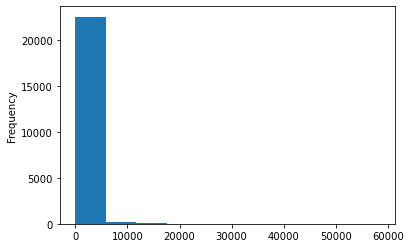

In [179]:
df_kid_book['review_length'].plot.hist(bins=10)

In [180]:
df_kid_book.loc[df_kid_book['review_length']>20000, 'book_id'].count()

21

In [181]:
df_kid_book.loc[df_kid_book['review_length']>5000, 'book_id'].count()

370

<AxesSubplot:ylabel='Frequency'>

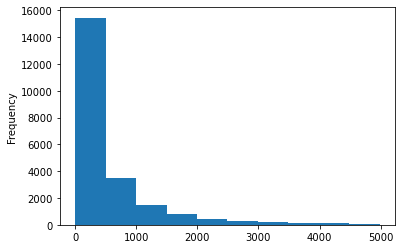

In [182]:
df_kid_book.loc[df_kid_book['review_length']<5000, 'review_length'].plot.hist(bins=10)

In [183]:
long_review_list = df_kid_book.loc[(df_kid_book['review_length']<5000) & (df_kid_book['review_length']>1000), 'book_id']
mask = df_kid_book['book_id'].isin(long_review_list)
df_kid_book_2 = df_kid_book[mask]
df_kid_book_2 = df_kid_book_2.reset_index()
df_kid_book_2.drop(['index'], axis=1, inplace=True)

df_kid_book_2.head(4)

,book_id,isbn,title,description,num_pages,authors,ratings_count,average_rating,image_url,url,...,authors_names,genres,positive_review,negative_review,clean_desc,lem_clean_desc,first_round,second_round,review_length,review_topic
0,89378,0590417010,Dog Heaven,In Newbery Medalist Cynthia Rylant's classic b...,40.0,"[{'author_id': '5411', 'role': ''}]",1331.0,4.43,https://images.gr-assets.com/books/1360057676m...,https://www.goodreads.com/book/show/89378.Dog_...,...,['Cynthia Rylant'],"{'children': 109, 'fiction': 13, 'non-fiction'...","Really cute, sweet, and charming.,This beautif...",I probably would have liked this book more if ...,newbery medalist cynthia rylant s classic best...,newberi medalist cynthia rylant s classic best...,cute sweet charming beautiful children s book ...,sweet charming s anonymously shortly loss belo...,1677,sweet charm s anonym short loss belov lil penn...
1,750456,0316939927,The Sound of Colors: A Journey of the Imagination,A young woman losing her vision rides the subw...,80.0,"[{'author_id': '325581', 'role': ''}, {'author...",462.0,4.36,https://images.gr-assets.com/books/1344265410m...,https://www.goodreads.com/book/show/750456.The...,...,"['Jimmy Liao', 'Sarah L. Thomson']","{'children': 62, 'fiction': 9, 'fantasy, paran...","Accompanied by her scruffy dog companion, a wo...",Sach dep mau dep moi thu deu dep tru cau chu o...,young woman losing vision rides subway dog sea...,young woman lose vision ride subway dog search...,accompanied scruffy dog companion woman losing...,accompanied scruffy dog companion woman losing...,1531,accompani scruffi dog companion woman lose los...
2,13588160,0803737513,If I Built a House,The much-anticipated follow-up to the E. B. Wh...,32.0,"[{'author_id': '95342', 'role': ''}]",714.0,4.44,https://images.gr-assets.com/books/1351267631m...,https://www.goodreads.com/book/show/13588160-i...,...,['Chris Van Dusen'],"{'children': 103, 'fiction': 13, 'poetry': 3, ...",Much of what I wrote for https://www.goodreads...,3.5 stars -- Neither young children nor their ...,anticipated follow e b white award winning pic...,anticip follow e b white award win pictur book...,wrote ve read built car van dusen enjoyed look...,wrote ve built car van dusen looking add perma...,1168,write ve build car van dusen look add perman c...
3,1076040,069001287X,Anno's Counting Book,"Every child is a natural mathematician, accord...",28.0,"[{'author_id': '72077', 'role': ''}]",551.0,4.06,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/1076040.An...,...,['Mitsumasa Anno'],"{'children': 96, 'non-fiction': 6, 'fiction': 4}",Genre: Counting \n Summary: A wordless picture...,Awesome description and intro. to math for you...,child natural mathematician according mitsumas...,child natur mathematician accord mitsumasa ann...,genre counting summary wordless picture book d...,genre counting summary wordless depicts notion...,1368,genr count summari wordless depict notion coun...


In [184]:
df_kid_book_2.shape

(3493, 21)

In [190]:
data_verbs = pd.DataFrame(df_kid_book_2['second_round'].apply(verbs))


In [191]:
tv_verb = TfidfVectorizer(ngram_range = (1,1), min_df = 1, max_df=0.6)


In [213]:
data_verbs = pd.DataFrame(df_kid_book_2['second_round'].apply(verbs))

tv_verb = TfidfVectorizer(ngram_range = (1,1), min_df = 1)
data_tv_verb = tv_verb.fit_transform(data_verbs['second_round'])

nmf_model = NMF(6)
doc_topic = nmf_model.fit_transform(data_tv_verb)

display_topics(nmf_model, tv_verb.get_feature_names(), 10)
                                                


Topic  0
received, illustrated, learning, makes, wants, written, learn, want, look, takes

Topic  1
rhyming, poems, rhymes, bed, rhyme, dr, makes, counting, illustrated, sing

Topic  2
rose, snow, booke, baking, wilder, talking, wonderland, paling, keluarga, weaving

Topic  3
willems, piggie, gerald, wants, elephant, mo, gets, pigeon, sharing, friend

Topic  4
know, remember, ending, going, got, writing, liked, written, said, felt

Topic  5
king, retelling, knight, kingdom, save, told, kadir, illustrated, known, telling


In [211]:
tv_verb = TfidfVectorizer(ngram_range = (1,1), min_df = 10, max_df=0.6)
data_tv_verb = tv_verb.fit_transform(data_verbs['second_round'])

nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(data_tv_verb)

display_topics(nmf_model, tv_verb.get_feature_names(), 10)
                                                



Topic  0
remember, got, writing, ending, said, liked, felt, thought, believe, started

Topic  1
rhyming, rhymes, bed, rhyme, dr, illustrated, received, sing, counting, bright

Topic  2
rose, snow, baking, talking, paling, wilder, wonderland, ring, ending, eve

Topic  3
wants, gets, loves, goes, comes, trying, getting, friends, finds, bullying

Topic  4
received, illustrated, learning, learn, includes, told, included, fascinating, look, learned

Topic  5
king, retelling, knight, kingdom, save, dragon, told, ending, comes, telling

Topic  6
poems, poetry, poem, writing, wonderland, included, includes, writes, wrote, falling

Topic  7
lost, missing, finds, left, snow, loses, ending, gets, dog, moving


In [199]:
nmf_model = NMF(20)
doc_topic = nmf_model.fit_transform(data_tv_verb)

display_topics(nmf_model, tv_verb.get_feature_names(), 10)


Topic  0
ending, felt, left, moving, told, happened, lives, living, coming, feel

Topic  1
rhyming, rhymes, rhyme, dr, bright, seuss, engaging, sing, grow, sounds

Topic  2
rose, booke, baking, wilder, talking, paling, keluarga, weaving, wonderland, oscar

Topic  3
willems, piggie, gerald, elephant, mo, sharing, pigeon, beginning, snake, ending

Topic  4
remember, said, got, growing, remembered, kid, started, thought, wanted, came

Topic  5
king, knight, retelling, kingdom, save, kadir, told, martin, grimm, lands

Topic  6
illustrated, includes, fascinating, stunning, amazing, learning, look, based, told, inspiring

Topic  7
bed, sleeping, sleep, soothing, scared, goodnight, boy, bedtime, gets, getting

Topic  8
poems, poetry, poem, wonderland, silverstein, shel, included, falling, includes, accompanied

Topic  9
lost, missing, loses, gets, dog, boy, finds, penguin, finding, beloved

Topic  10
snow, waiting, retelling, snowflake, fractured, sleeping, fairy, seen, falling, grimm

Topic

In [200]:
data_nouns = pd.DataFrame(df_kid_book_2['second_round'].apply(nouns_v))

tv_noun = TfidfVectorizer(ngram_range = (1,1), min_df = 1, max_df=0.6)
data_tv_noun = tv_noun.fit_transform(data_nouns['second_round'])
nmf_model = NMF(6)
doc_topic = nmf_model.fit_transform(data_tv_noun)

display_topics(nmf_model, tv_noun.get_feature_names(), 10)
                                                


Topic  0
character, adventure, girls, friends, parents, grade, boy, house, movie, remember

Topic  1
dog, dogs, squirrel, boy, pet, rescue, home, pets, lovers, bone

Topic  2
piggie, gerald, willems, mo, elephant, pigeon, friends, pig, friend, piggy

Topic  3
animals, bear, words, page, pictures, poems, colors, text, art, rhyming

Topic  4
cat, cats, kitten, mouse, seuss, dr, pete, chester, binky, kittens

Topic  5
christmas, santa, reindeer, claus, elves, holiday, season, eve, tree, movie


In [210]:
text = [nouns_v(df_kid_book_2.loc[i, 'second_round']) for i in range(len(df_kid_book_2))] 
docs = [d.split() for d in text]
dictionary_LDA = corpora.Dictionary(docs)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(doc) for doc in docs]

num_topics = 6
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=3, alpha=[0.1]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=6):
    print(str(i)+": "+ topic)
    print()

Wall time: 15.5 s
0: 0.007*"boy" + 0.005*"dog" + 0.005*"history" + 0.004*"friends" + 0.004*"dogs" + 0.004*"parents"

1: 0.005*"friends" + 0.004*"kid" + 0.004*"remember" + 0.004*"friend" + 0.004*"parents" + 0.003*"piggie"

2: 0.007*"cat" + 0.005*"parents" + 0.004*"mother" + 0.004*"boy" + 0.003*"dr" + 0.003*"words"

3: 0.005*"words" + 0.004*"dog" + 0.003*"princess" + 0.003*"pictures" + 0.003*"pages" + 0.003*"friends"

4: 0.009*"animals" + 0.006*"friends" + 0.004*"pictures" + 0.004*"house" + 0.004*"parents" + 0.003*"friend"

5: 0.005*"adventure" + 0.004*"tale" + 0.004*"tales" + 0.003*"words" + 0.003*"art" + 0.003*"poems"



In [209]:
text = [verbs(df_kid_book_2.loc[i, 'second_round']) for i in range(len(df_kid_book_2))] 
docs = [d.split() for d in text]
dictionary_LDA = corpora.Dictionary(docs)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(doc) for doc in docs]

num_topics = 6
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=3, alpha=[0.1]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=6):
    print(str(i)+": "+ topic)
    print()

Wall time: 10.8 s
0: 0.009*"received" + 0.009*"ending" + 0.008*"gets" + 0.007*"takes" + 0.007*"goes" + 0.005*"trying"

1: 0.010*"rose" + 0.008*"illustrated" + 0.008*"learning" + 0.006*"interesting" + 0.006*"amazing" + 0.006*"wants"

2: 0.008*"having" + 0.008*"gets" + 0.007*"wants" + 0.006*"ending" + 0.006*"getting" + 0.006*"remember"

3: 0.009*"lost" + 0.007*"ending" + 0.007*"having" + 0.007*"felt" + 0.006*"comes" + 0.006*"gets"

4: 0.010*"remember" + 0.008*"received" + 0.007*"came" + 0.007*"said" + 0.006*"told" + 0.006*"come"

5: 0.011*"wants" + 0.008*"illustrated" + 0.007*"gets" + 0.007*"comes" + 0.007*"told" + 0.007*"goes"



In [169]:
text = [df_kid_book_2.loc[i, 'second_round'] for i in range(len(df_kid_book_2))]
docs = [d.split() for d in text]
dictionary_LDA = corpora.Dictionary(docs)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(doc) for doc in docs]

num_topics = 6
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=3, alpha=[0.1]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=6):
    print(str(i)+": "+ topic)
    print()

Wall time: 15 s
0: 0.003*"dog" + 0.003*"kid" + 0.003*"boy" + 0.002*"anne" + 0.002*"parents" + 0.002*"magic"

1: 0.005*"bear" + 0.005*"animals" + 0.004*"text" + 0.004*"boy" + 0.004*"art" + 0.004*"words"

2: 0.003*"text" + 0.003*"tale" + 0.003*"mother" + 0.003*"pictures" + 0.003*"words" + 0.003*"simple"

3: 0.004*"mother" + 0.004*"father" + 0.003*"middle" + 0.003*"novel" + 0.003*"grade" + 0.003*"friends"

4: 0.005*"funny" + 0.004*"cat" + 0.003*"adventure" + 0.003*"friends" + 0.003*"aloud" + 0.003*"boy"

